In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Data/training.csv')
df.shape

(7049, 31)

In [2]:
df.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [4]:
print(df.count())

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

***Visulaize the training data***

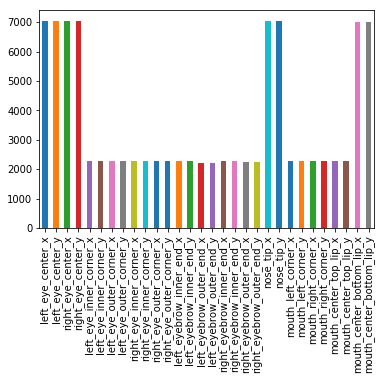

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

df.describe().loc['count'].plot.bar()

***Seperate the training images from the taget values***

In [6]:
def format_img(x):
    return np.asarray([int(e) for e in x.split(' ')], dtype=np.uint8).reshape(96,96)

In [7]:
def load():
    X = np.stack([format_img(string) for string in df['Image']]).astype(np.float32)[:, :, :, np.newaxis] #without_dropna
    y = df[df.columns[:-1]].values.astype(np.float32)
    
    return  X, y

In [8]:
 X, y = load()

In [9]:
X.shape, y.shape

((7049, 96, 96, 1), (7049, 30))

***x co-ordinate and y coordinate of the 15 landmark points on the face***

In [10]:
def information(image_no):
    left_eye_center_x = df['left_eye_center_x'][image_no]/96
    left_eye_center_y = df['left_eye_center_y'][image_no]/96

    right_eye_center_x = df['right_eye_center_x'][image_no]/96
    right_eye_center_y = df['right_eye_center_y'][image_no]/96

    left_eye_inner_corner_x = df['left_eye_inner_corner_x'][image_no]/96
    left_eye_inner_corner_y = df['left_eye_inner_corner_y'][image_no]/96

    left_eye_outer_corner_x = df['left_eye_outer_corner_x'][image_no]/96
    left_eye_outer_corner_y = df['left_eye_outer_corner_y'][image_no]/96

    right_eye_inner_corner_x = df['right_eye_inner_corner_x'][image_no]/96
    right_eye_inner_corner_y = df['right_eye_inner_corner_y'][image_no]/96

    right_eye_outer_corner_x = df['right_eye_outer_corner_x'][image_no]/96
    right_eye_outer_corner_y = df['right_eye_outer_corner_y'][image_no]/96

    left_eyebrow_inner_end_x = df['left_eyebrow_inner_end_x'][image_no]/96
    left_eyebrow_inner_end_y = df['left_eyebrow_inner_end_y'][image_no]/96

    left_eyebrow_outer_end_x = df['left_eyebrow_outer_end_x'][image_no]/96
    left_eyebrow_outer_end_y = df['left_eyebrow_outer_end_y'][image_no]/96

    right_eyebrow_inner_end_x = df['right_eyebrow_inner_end_x'][image_no]/96
    right_eyebrow_inner_end_y = df['right_eyebrow_inner_end_y'][image_no]/96

    right_eyebrow_outer_end_x = df['right_eyebrow_outer_end_x'][image_no]/96
    right_eyebrow_outer_end_y = df['right_eyebrow_outer_end_y'][image_no]/96

    nose_tip_x = df['nose_tip_x'][image_no]/96
    nose_tip_y = df['nose_tip_y'][image_no]/96

    mouth_left_corner_x = df['mouth_left_corner_x'][image_no]/96
    mouth_left_corner_y = df['mouth_left_corner_y'][image_no]/96

    mouth_right_corner_x = df['mouth_right_corner_x'][image_no]/96
    mouth_right_corner_y = df['mouth_right_corner_y'][image_no]/96

    mouth_center_top_lip_x = df['mouth_center_top_lip_x'][image_no]/96
    mouth_center_top_lip_y = df['mouth_center_top_lip_y'][image_no]/96

    mouth_center_bottom_lip_x = df['mouth_center_bottom_lip_x'][image_no]/96
    mouth_center_bottom_lip_y = df['mouth_center_bottom_lip_y'][image_no]/96
    
    y_target = [left_eye_center_x,right_eye_center_x,left_eye_inner_corner_x,
              left_eye_outer_corner_x,right_eye_inner_corner_x,
              right_eye_outer_corner_x,left_eyebrow_inner_end_x,left_eyebrow_outer_end_x,
              right_eyebrow_inner_end_x,right_eyebrow_outer_end_x,nose_tip_x,
              mouth_left_corner_x,mouth_right_corner_x,mouth_center_top_lip_x,mouth_center_bottom_lip_x,
              left_eye_center_y,right_eye_center_y,left_eye_inner_corner_y,
              left_eye_outer_corner_y,left_eye_outer_corner_y,right_eye_inner_corner_y,left_eyebrow_inner_end_y,
              left_eyebrow_outer_end_y,
              right_eyebrow_inner_end_y,right_eyebrow_outer_end_y,nose_tip_y,
              mouth_left_corner_y,mouth_right_corner_y,mouth_center_top_lip_y,mouth_center_bottom_lip_y]
    return y_target

In [11]:
print(information(0))

[0.68784962406041661, 0.31486466165416666, 0.62064661654166675, 0.76177443609062501, 0.37871428571458332, 0.24430075188020836, 0.59326315789479167, 0.83569924811979168, 0.41903759398541668, 0.17037894736875001, 0.46271428571458334, 0.63745112781979163, 0.29806766917291666, 0.45117293233125005, 0.44927819548854164, 0.40627368421041665, 0.37939248120312502, 0.41299398496249995, 0.41635413533854165, 0.41635413533854165, 0.38947293233125002, 0.30243383458645834, 0.33570977443645833, 0.30210751879687497, 0.30882781954895833, 0.59444586466145832, 0.83302255639062495, 0.80613533834583329, 0.7597443609020833, 0.88006015037604168]


***Draw Key points***

In [12]:
def draw_key_points(X):
    i = 0
    x = []
    y = []
    while i<15:
        x.append(output[i]*96)
        i = i +1
    while i<30:
        y.append(output[i]*96)
        i = i +1    
    plt.scatter(x=x,y=y, c='red', s=10)
    plt.imshow(X[..., 0],cmap='gray')

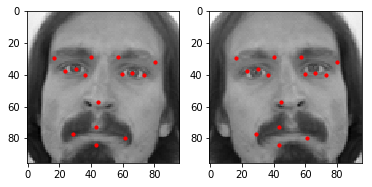

In [13]:
output=information(0)

plt.subplot(1,2,1)
draw_key_points(X[0])

plt.subplot(1,2,2)
X_flipped_hor = X[:,:,::-1,:]
draw_key_points(X_flipped_hor[0])

plt.show()

***Draw Flipped Points***

In [14]:
def flip_points(image_no):
    output = information(image_no)
    i =0
    while i<15:
        output[i] = 1 - output[i]
        i = i +1
    return output

In [15]:
print(flip_points(0))

[0.31215037593958339, 0.6851353383458334, 0.37935338345833325, 0.23822556390937499, 0.62128571428541668, 0.75569924811979161, 0.40673684210520833, 0.16430075188020832, 0.58096240601458327, 0.82962105263124997, 0.5372857142854166, 0.36254887218020837, 0.70193233082708328, 0.54882706766874989, 0.55072180451145836, 0.40627368421041665, 0.37939248120312502, 0.41299398496249995, 0.41635413533854165, 0.41635413533854165, 0.38947293233125002, 0.30243383458645834, 0.33570977443645833, 0.30210751879687497, 0.30882781954895833, 0.59444586466145832, 0.83302255639062495, 0.80613533834583329, 0.7597443609020833, 0.88006015037604168]


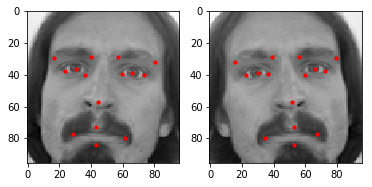

In [16]:
output=information(0)
plt.subplot(1,2,1)
draw_key_points(X[0])

output = flip_points(0)
plt.subplot(1,2,2)
draw_key_points(X[0,:,::-1,:])

plt.show()

***generate additional 2140 horizontal augmented images***

In [17]:
import math
i = 0
X_horizontal = []
y_horizontal = []

while i<7049:
    k = 0
    flag = 0
    while k<30:
        if math.isnan(information(i)[k]):
            flag = 1
            break
        k = k +1
    if flag ==0:
        flipped_image= X[i,:,::-1,:]
        output = flip_points(i)
        X_horizontal.append(flipped_image)
        y_horizontal.append(output)
    if i%500 == 0:
        print(i)
    i = i +1

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000


In [18]:
X_horizontal = np.asarray(X_horizontal)
y_horizontal = np.asarray(y_horizontal)
print(X_horizontal.shape)
print(y_horizontal.shape)

(2140, 96, 96, 1)
(2140, 30)


In [19]:
X_horizontal_norm = X_horizontal/255 # image pixels from 0 to 1

***Drop rows with missing values***

In [25]:
df_drop = df.dropna()
df_drop.shape

(2140, 31)

In [26]:
X_img  = np.stack([format_img(string) for string in df_drop['Image']]).astype(np.float32)[:, :, :, np.newaxis]
y_tag  = df_drop[df_drop.columns[:-1]].values.astype(np.float32)
X_true = X_img/255  
y_true = y_tag/96    

In [27]:
print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format
      (X_true.shape, X_true.min(), X_true.max()))
print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format
      (y_true.shape, y_true.min(), y_true.max()))

X.shape == (2140, 96, 96, 1); X.min == 0.000; X.max == 1.000
y.shape == (2140, 30); y.min == 0.040; y.max == 0.998


***Stack the augmented image with the training data***

In [23]:
X_train = np.vstack([X_true,X_horizontal_norm])
Y_train = np.vstack([y_true,y_horizontal])
X_train.shape, Y_train.shape

((4280, 96, 96, 1), (4280, 30))

***Neural network architecture***

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Dropout, Activation, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras import regularizers

model5 = Sequential()
# input layer
model5.add(BatchNormalization(input_shape=(96, 96, 1)))
model5.add(Conv2D(24, (3, 3), kernel_initializer='he_normal'))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))          

# layer 2
model5.add(Conv2D(36, (2, 2)))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model5.add(BatchNormalization())
model5.add(Dropout(0.3))

# layer 3
model5.add(Conv2D(48, (2, 2)))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model5.add(BatchNormalization())

# layer 4
model5.add(Conv2D(64, (2, 2)))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model5.add(BatchNormalization())
model5.add(Dropout(0.3))

model5.add(Flatten())

# layer 5
model5.add(Dense(500, activation="relu"))

model5.add(Dense(500, activation="relu"))
# output layer
model5.add(Dense(30))

Using TensorFlow backend.


In [26]:
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 96, 96, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 94, 94, 24)        240       
_________________________________________________________________
activation_1 (Activation)    (None, 94, 94, 24)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 36)        3492      
_________________________________________________________________
activation_2 (Activation)    (None, 46, 46, 36)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 36)        0         
__________

In [27]:
from sklearn.utils import shuffle

X_final, Y_final = shuffle(X_train, Y_train, random_state=42)

***Train the Model***

In [33]:
from keras import optimizers
from keras.callbacks import LearningRateScheduler

learning_rates = np.linspace(0.03, 0.001, 300)
change_lr = LearningRateScheduler(lambda epoch: float(learning_rates[epoch]))
sgd = optimizers.SGD(lr=0.03, momentum=0.9, nesterov=True)
model5.compile(loss='mse',metrics=['accuracy'], optimizer=sgd)
history5 = model5.fit(X_final, Y_final, shuffle= True, validation_split=0.2, 
                    epochs=300, batch_size=64,callbacks=[change_lr])

model5.save("model5.h5")

Train on 3424 samples, validate on 856 samples
Epoch 1/300
3424/3424 [==============================] - 7s 2ms/step - loss: 0.1166 - acc: 0.3405 - val_loss: 0.1005 - val_acc: 0.6612
Epoch 2/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0197 - acc: 0.6376 - val_loss: 0.0380 - val_acc: 0.6741
Epoch 3/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0169 - acc: 0.6571 - val_loss: 0.0223 - val_acc: 0.6787
Epoch 4/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0145 - acc: 0.6644 - val_loss: 0.0172 - val_acc: 0.6799
Epoch 5/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0130 - acc: 0.6641 - val_loss: 0.0155 - val_acc: 0.6764
Epoch 6/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0117 - acc: 0.6542 - val_loss: 0.0137 - val_acc: 0.6764
Epoch 7/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0110 - acc: 0.6545 - val_loss: 0.0122 - val_acc: 0.6764
Epoch 8/

Epoch 61/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0041 - acc: 0.5812 - val_loss: 0.0083 - val_acc: 0.5724
Epoch 62/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0041 - acc: 0.5952 - val_loss: 0.0082 - val_acc: 0.5876
Epoch 63/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0041 - acc: 0.5733 - val_loss: 0.0076 - val_acc: 0.5946
Epoch 64/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0041 - acc: 0.5891 - val_loss: 0.0077 - val_acc: 0.5853
Epoch 65/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0039 - acc: 0.5856 - val_loss: 0.0080 - val_acc: 0.5900
Epoch 66/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0040 - acc: 0.5920 - val_loss: 0.0074 - val_acc: 0.6005
Epoch 67/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0040 - acc: 0.5870 - val_loss: 0.0077 - val_acc: 0.6028
Epoch 68/300
3424/3424 [========================

3424/3424 [==============================] - 4s 1ms/step - loss: 0.0030 - acc: 0.5932 - val_loss: 0.0074 - val_acc: 0.5900
Epoch 122/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0029 - acc: 0.5917 - val_loss: 0.0072 - val_acc: 0.5853
Epoch 123/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0030 - acc: 0.5920 - val_loss: 0.0074 - val_acc: 0.5981
Epoch 124/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0029 - acc: 0.6002 - val_loss: 0.0073 - val_acc: 0.6121
Epoch 125/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0029 - acc: 0.5853 - val_loss: 0.0074 - val_acc: 0.6016
Epoch 126/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0029 - acc: 0.5949 - val_loss: 0.0072 - val_acc: 0.6005
Epoch 127/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0029 - acc: 0.5908 - val_loss: 0.0073 - val_acc: 0.5923
Epoch 128/300
3424/3424 [==============================

Epoch 181/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0025 - acc: 0.5926 - val_loss: 0.0072 - val_acc: 0.5970
Epoch 182/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0025 - acc: 0.5932 - val_loss: 0.0072 - val_acc: 0.5864
Epoch 183/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0026 - acc: 0.5975 - val_loss: 0.0071 - val_acc: 0.5958
Epoch 184/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0025 - acc: 0.5955 - val_loss: 0.0072 - val_acc: 0.5829
Epoch 185/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0025 - acc: 0.5911 - val_loss: 0.0072 - val_acc: 0.5736
Epoch 186/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0025 - acc: 0.5926 - val_loss: 0.0072 - val_acc: 0.5853
Epoch 187/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0025 - acc: 0.5859 - val_loss: 0.0073 - val_acc: 0.5818
Epoch 188/300
3424/3424 [================

Epoch 241/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0023 - acc: 0.6005 - val_loss: 0.0071 - val_acc: 0.5911
Epoch 242/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0023 - acc: 0.5964 - val_loss: 0.0072 - val_acc: 0.5876
Epoch 243/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0024 - acc: 0.5984 - val_loss: 0.0071 - val_acc: 0.5853
Epoch 244/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0024 - acc: 0.5935 - val_loss: 0.0071 - val_acc: 0.5864
Epoch 245/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0023 - acc: 0.6031 - val_loss: 0.0071 - val_acc: 0.5829
Epoch 246/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0023 - acc: 0.6051 - val_loss: 0.0071 - val_acc: 0.5841
Epoch 247/300
3424/3424 [==============================] - 4s 1ms/step - loss: 0.0024 - acc: 0.6119 - val_loss: 0.0071 - val_acc: 0.5806
Epoch 248/300
3424/3424 [================

***Draw accuracy and loss***

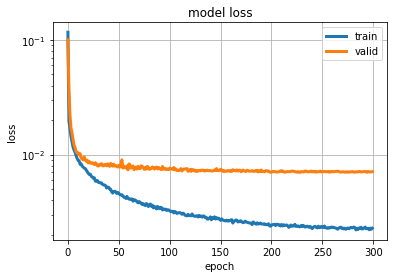

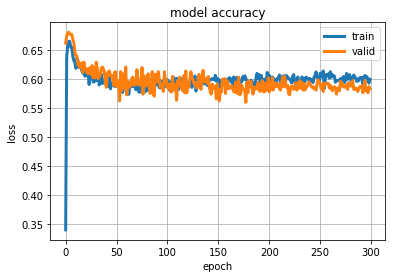

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history5.history['loss'], linewidth=3, label="train")
plt.plot(history5.history['val_loss'], linewidth=3, label="valid")
plt.title('model loss')
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.yscale("log")
plt.show()

plt.plot(history5.history['acc'], linewidth=3, label="train")
plt.plot(history5.history['val_acc'], linewidth=3, label="valid")
plt.title('model accuracy')
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

***Testing Data***

In [28]:
import pandas as pd
import numpy as np

df_test = pd.read_csv('Data/testing.csv')
df_test.shape

(1783, 2)

In [29]:
def format_img(x):
    return np.asarray([int(e) for e in x.split(' ')], dtype=np.uint8)

In [30]:
X_test= np.stack([format_img(string) for string in df_test['Image']]).astype(np.float32)

In [31]:
def test_img(img_num):
    return np.reshape(X_test[img_num], (1,96,96,1))/255

In [36]:
def plot_sample(x, y):
    img = x.reshape(96, 96)
    plt.imshow(img, cmap='gray')
    plt.scatter(y[0::2] * 96, y[1::2] * 96, marker='o', s=10)

***Model Prediction***

In [37]:
from keras.models import load_model
model5 = load_model('model5.h5')

In [38]:
print(model5.predict(test_img(50))[0]*96)

[ 70.54038239  32.44839096  28.04964447  38.92152023  58.43683624
  33.04823685  77.64608765  39.27357101  33.1619873   32.58681107
  18.21831894  39.83859253  55.13313293  27.31564331  84.49230957
  28.7647419   38.91280365  29.20933342  12.67878914  30.99137115
  49.12556076  62.31106567  69.57299042  82.74494934  32.81479263
  80.90300751  46.03416443  74.38642883  46.78430939  84.04634094]


***Test Images***

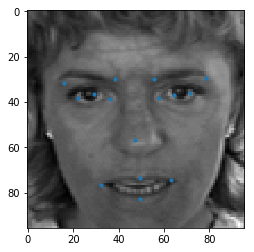

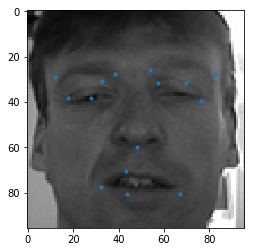

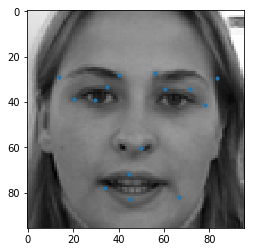

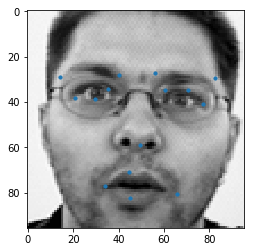

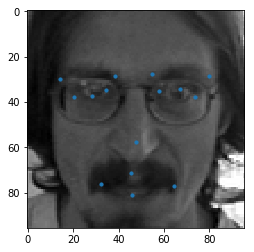

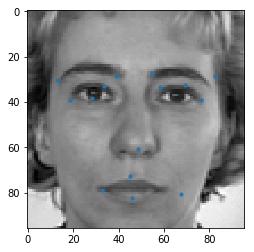

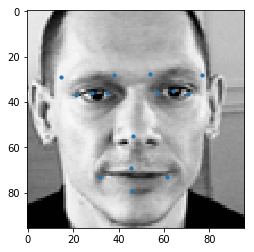

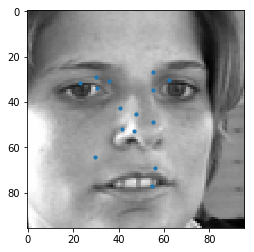

In [39]:
output = model5.predict(test_img(1))[0]
plot_sample(X_test[1], output)
plt.show()

output = model5.predict(test_img(4))[0]
plot_sample(X_test[4], output)
plt.show()

output = model5.predict(test_img(8))[0]
plot_sample(X_test[8], output)
plt.show()

output = model5.predict(test_img(10))[0]
plot_sample(X_test[10], output)
plt.show()

output = model5.predict(test_img(12))[0]
plot_sample(X_test[12], output)
plt.show()

output = model5.predict(test_img(16))[0]
plot_sample(X_test[16], output)
plt.show()

output = model5.predict(test_img(123))[0]
plot_sample(X_test[123], output)
plt.show()

output = model5.predict(test_img(6))[0]
plot_sample(X_test[6], output)
plt.show()

***Evaluation Metrics***

In [47]:
y_predict = model5.predict(X_true,verbose=1)

2140/2140 [==============================] - 30s 14ms/step


In [48]:
y_predict[0]

array([ 0.72452343,  0.35261643,  0.30116445,  0.39919734,  0.61576253,
        0.35553649,  0.79448962,  0.4146266 ,  0.35990518,  0.34874231,
        0.20761234,  0.3967562 ,  0.57490718,  0.28192958,  0.85449499,
        0.29914549,  0.41081649,  0.29270732,  0.14114934,  0.30379403,
        0.50752842,  0.61520445,  0.68553352,  0.83096492,  0.34504116,
        0.80179185,  0.46432996,  0.74027312,  0.46947849,  0.8522988 ], dtype=float32)

In [49]:
y_true[0]

array([ 0.68784958,  0.40627369,  0.31486467,  0.37939247,  0.62064666,
        0.412994  ,  0.76177448,  0.41635415,  0.37871429,  0.38947293,
        0.24430074,  0.38947293,  0.59326315,  0.30243382,  0.83569926,
        0.33570978,  0.41903758,  0.30210751,  0.17037894,  0.30882782,
        0.46271428,  0.59444588,  0.63745111,  0.83302259,  0.29806766,
        0.80613536,  0.45117295,  0.75974435,  0.44927821,  0.88006014], dtype=float32)

***Calculating MSE***

In [50]:
from sklearn.metrics import mean_squared_error
from math import sqrt

MSE = mean_squared_error(y_true,y_predict)

In [51]:
print(MSE)

0.00255758


***Calculating RMSE***

In [53]:
np.sqrt(MSE) * 96

4.8549610376358032